# Importing Libraries

Importing libraries is an essential step in any data analysis or machine learning project. These libraries provide various functions and tools to manipulate, visualize, and analyze data efficiently. Here are explanations of some popular data analysis libraries

Pandas: Pandas is a powerful and widely used library for data manipulation and analysis. It provides data structures like DataFrames and Series, which allow you to store and manipulate tabular data. Pandas offers a wide range of functions for data cleaning, filtering, aggregation, merging, and more. It also supports reading and writing data from various file formats such as CSV, Excel, SQL databases, and more.

NumPy: NumPy (Numerical Python) is a fundamental library for scientific computing in Python. It provides efficient data structures like arrays and matrices and a vast collection of mathematical functions. NumPy enables you to perform various numerical operations on large datasets, such as element-wise calculations, linear algebra, Fourier transforms, and random number generation. It also integrates well with other libraries for data analysis and machine learning.

Matplotlib: Matplotlib is a popular plotting library that enables you to create a wide range of static, animated, and interactive visualizations. It provides a MATLAB-like interface and supports various types of plots, including line plots, scatter plots, bar plots, histograms, and more. Matplotlib gives you extensive control over plot customization, including labels, colors, legends, and annotations, allowing you to effectively communicate insights from your data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Dataset From keras.datasets

In [2]:
from tensorflow.keras.datasets import mnist

# Splitting Dataset

Splitting the data refers to dividing the dataset into separate subsets for training, validation, and testing purposes. This division is essential to assess the performance of a machine learning model on unseen data and prevent overfitting. Here are the common types of data splits:

Train-Test Split: This is the most basic type of split, where the dataset is divided into a training set and a testing set. The training set is used to train the machine learning model, while the testing set is used to evaluate its performance. The split is typically done using a fixed ratio, such as 80% for training and 20% for testing.

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

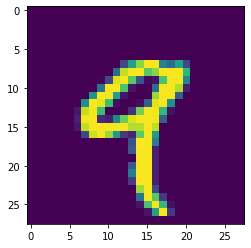

In [5]:
plt.imshow(x_train[4])

# Converting To Categorical

Converting data to categorical format is often necessary for certain machine learning tasks, especially when dealing with categorical or nominal variables. This conversion is typically performed to represent the categorical variables as numeric values that can be processed by machine learning algorithms.

In [6]:
from tensorflow.keras.utils import to_categorical

In [7]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [8]:
x_train.max()

255

In [9]:
x_train = x_train / 255
x_test = x_test / 255

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_test.shape

(10000, 28, 28)

# Reshaping Images

Reshaping data is a common operation in machine learning when you need to adjust the dimensions or structure of your data to meet the requirements of a particular algorithm or model. 

In [12]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [13]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

# Creating Model

Creating a deep learning model involves defining the architecture and structure of the neural network, specifying the layers, and configuring the parameters for training.

In [16]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (4, 4), input_shape = (28, 28, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

# Compiling Model

Compiling the model in deep learning involves configuring essential components that define how the model will be trained.

In [18]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3)

# Training Model

Training the model in deep learning involves the process of iteratively updating the model's parameters (weights and biases) based on the provided training data to minimize the loss function and improve the model's performance

In [20]:
model.fit(x_train,
          y_train_categorical, 
          validation_data = (x_test, y_test_categorical),
          epochs = 20,
          callbacks = [early_stopping])

Epoch 1/20
1875/1875 [==============================] - 98s 48ms/step - loss: 0.1354 - accuracy: 0.9585 - val_loss: 0.0589 - val_accuracy: 0.9798
Epoch 2/20
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0459 - accuracy: 0.9862 - val_loss: 0.0456 - val_accuracy: 0.9854
Epoch 3/20
1875/1875 [==============================] - 168s 90ms/step - loss: 0.0306 - accuracy: 0.9904 - val_loss: 0.0381 - val_accuracy: 0.9876
Epoch 4/20
1875/1875 [==============================] - 137s 73ms/step - loss: 0.0203 - accuracy: 0.9933 - val_loss: 0.0506 - val_accuracy: 0.9845
Epoch 5/20
1875/1875 [==============================] - 127s 68ms/step - loss: 0.0137 - accuracy: 0.9957 - val_loss: 0.0387 - val_accuracy: 0.9881
Epoch 6/20
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0106 - accuracy: 0.9965 - val_loss: 0.0465 - val_accuracy: 0.9869


In [21]:
model.save('CNN_model_for_MNIST.h5')

In [22]:
loss = pd.DataFrame(model.history.history)

In [23]:
loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.135416,0.958533,0.058893,0.9798
1,0.045930,0.986233,0.045643,0.9854
2,0.030555,0.990433,0.038127,0.9876
3,0.020309,0.993333,0.050573,0.9845
4,0.013738,0.995700,0.038691,0.9881


<AxesSubplot:>

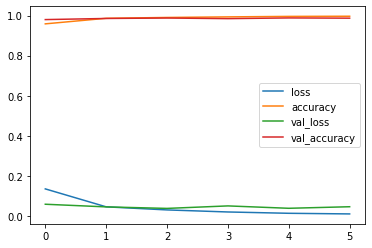

In [24]:
loss.plot()

<AxesSubplot:>

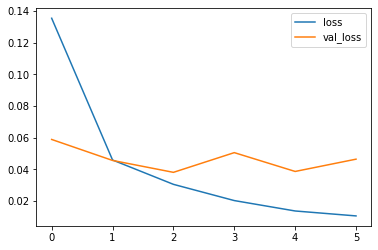

In [25]:
loss[['loss', 'val_loss']].plot()

<AxesSubplot:>

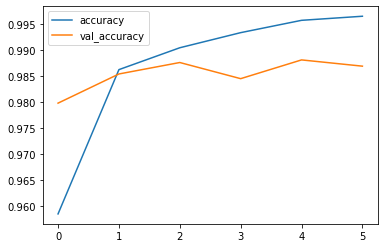

In [26]:
loss[['accuracy', 'val_accuracy']].plot()

In [29]:
predictions = model.predict(x_test)
predicted_classes = predictions.argmax(axis=1)

313/313 [==============================] - 7s 22ms/step


# Error Analysis

Error analysis is an important step in evaluating and improving the performance of a machine learning model. It involves analyzing the errors made by the model during predictions to gain insights into the patterns, sources, and potential improvements.

In [31]:
print(classification_report(y_test,predicted_classes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.98      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [32]:
confusion_matrix(y_test,predicted_classes)

array([[ 974,    0,    0,    0,    1,    0,    3,    1,    1,    0],
       [   0, 1132,    0,    2,    0,    0,    1,    0,    0,    0],
       [   1,    2, 1010,    5,    1,    0,    2,    7,    4,    0],
       [   0,    0,    0, 1005,    0,    4,    0,    1,    0,    0],
       [   0,    0,    0,    0,  978,    0,    1,    0,    0,    3],
       [   1,    0,    0,    6,    0,  883,    1,    0,    1,    0],
       [   4,    1,    0,    0,    1,    7,  944,    0,    1,    0],
       [   0,    2,    3,    1,    0,    0,    0, 1020,    1,    1],
       [   1,    0,    1,    4,    0,    4,    0,    3,  959,    2],
       [   1,    2,    0,    3,   18,    8,    0,   12,    1,  964]],
      dtype=int64)

<AxesSubplot:>

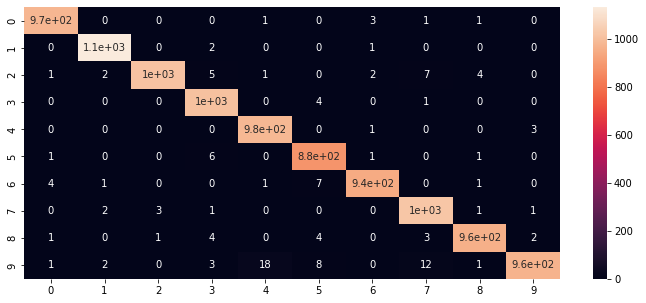

In [33]:
plt.figure(figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test,predicted_classes),annot=True)

# Predicting 

In [34]:
test_prediction = x_test[5]

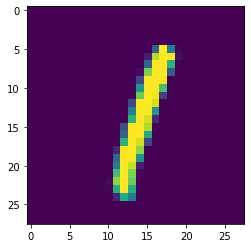

In [35]:
plt.imshow(test_prediction.reshape(28,28))

In [38]:
predictions = model.predict(test_prediction.reshape(1, 28, 28, 1))
predicted_class = np.argmax(predictions)

print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 109ms/step
Predicted class: 1
